In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('./data/ks-projects-201801.csv')
print("Shape:", df.shape)
df.head()

Shape: (378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
y = df.state
y.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [4]:
y.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

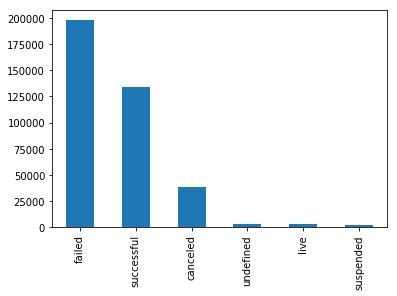

In [5]:
y.value_counts().plot.bar()

In [6]:
# successful=> True / other=> False
y_bool = y =='successful'
y_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

In [7]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

## 数字を抽出

In [55]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00
3,1000007540,5000.0,1.0,1,1.0,1.0,5000.00
4,1000011046,19500.0,1283.0,14,1283.0,1283.0,19500.00


In [61]:
X = df_num.drop(['ID','usd_pledged_real', 'backers'], axis=1)
X.head()

,goal,pledged,usd pledged,usd_goal_real
0,1000.0,0.0,0.0,1533.95
1,30000.0,2421.0,100.0,30000.00
2,45000.0,220.0,220.0,45000.00
3,5000.0,1.0,1.0,5000.00
4,19500.0,1283.0,1283.0,19500.00


## 数字以外を抽出

In [9]:
df_obj = df.select_dtypes(include=['O'])
df_obj.head()

,name,category,main_category,currency,deadline,launched,state,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US


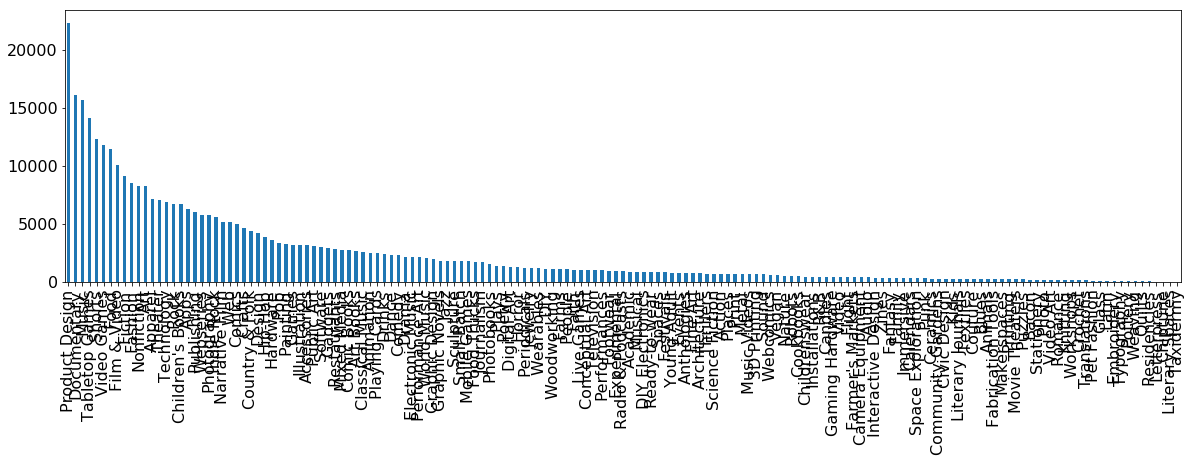

In [19]:
df_obj.category.value_counts().plot(kind='bar', figsize=(20,5), fontsize=16)

In [21]:
col_name = ['category', 'main_category', 'currency', 'country']
col_date = ['deadline', 'launched']

In [22]:
# テキストを数字に変換
df_cat = pd.DataFrame()
for name in col_name:
    df_cat[name] = df_obj[name].astype('category').cat.codes

In [23]:
df_cat.head()

,category,main_category,currency,country
0,108,12,5,9
1,93,6,13,22
2,93,6,13,22
3,90,10,13,22
4,55,6,13,22


In [51]:
# pd.to_datetime(df_obj['launched'], format="%y%m%d")
df_obj.launched.str.replace('-', '').to_datetime(df_obj['launched'], format="%y%m%d")

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# launchからdeadlineまでの日数を特徴量にする
df_date = pd.Series()
for name in col_date:
    df_obj[name] = df_obj[name]

In [65]:
# ロジスティック回帰
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=0)
clf.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
X[X > 0].dropna('0')

ValueError: No axis named 0 for object type <class 'pandas.core.frame.DataFrame'>